# <img src="https://www.stata.com/includes/images/stata-fb.jpg" alt="Stata" width="200"/> in a <img src="https://www.python.org/static/community_logos/python-logo-inkscape.svg" alt="Python" width=200/> <img src="https://raw.githubusercontent.com/adebar/awesome-jupyter/master/logo.png" alt="Jupyter" width=250/> Notebook

You can work with ``Stata`` in a ``Python`` notebook by using the package ``ipystata``. Just like ``r2py``, which allows us to use ``R`` in ``Python``, we can now use both (or if you want all three!) programming languages in one notebook.

# Setup

Let's start by importing all the packages we want to use.

In [1]:
import numpy as np
import pandas as pd
import ipystata
%pylab --no-import-all
%matplotlib inline

IPyStata is loaded in batch mode.
Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# %%stata magic

In order to use ``ipystata`` you will need to use the ``%%stata`` magic. Let's see the help for it.

In [2]:
%%stata?

Docstring:
::

  %stata [-i INPUT] [-d DATA] [-o OUTPUT] [-np] [-cwd CHANGEWD] [-gr] [-os] [-cl]

optional arguments:
  -i INPUT, --input INPUT
                        This is an input argument.
  -d DATA, --data DATA  This is the data input argument.
  -o OUTPUT, --output OUTPUT
                        This is the output argument.
  -np, --noprint        Force the magic to not return an output.
  -cwd CHANGEWD, --changewd CHANGEWD
                        Define a working directory for the Stata session.
  -gr, --graph          This will classify the Stata cell as one that returns a graph.
  -os, --openstata      Open Stata.
  -cl, --close          Tries (!) to auto-close Stata
File:      ~/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/ipystata/ipystata_magic_batch.py


# First example
Let's run some commands in ``Stata`` from this notebook. Let's run the same code as in the [Stata Notebook Example](./Stata%20Notebook%20Example.ipynb). To do so, we will use the ``%%stata`` magic.

In [3]:
%%stata
sysuse auto.dta
summ
desc
reg price mpg rep78 headroom trunk weight length turn displacement gear_ratio foreign, r
scatter price mpg, mlabel(make)


(1978 Automobile Data)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+---------------------------------------------------------
  gear_ratio 

Notice that it returned everything except the graph. To be able to get the graph we need to provide the option ``-s graph_session`` to the ``%%stata`` magic.

In [4]:
%%stata -gr
sysuse auto.dta
summ
desc
reg price mpg rep78 headroom trunk weight length turn displacement gear_ratio foreign, r
scatter price mpg, mlabel(make)


(1978 Automobile Data)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+---------------------------------------------------------
  gear_ratio 

Looks like there are issues preventing ``Stata`` to pass the figure back to ``Jupyter``. Nonetheless, we can save it in ``Stata`` and open it here.

In [5]:
%%stata -gr
sysuse auto.dta
summ
desc
reg price mpg rep78 headroom trunk weight length turn displacement gear_ratio foreign, r
scatter price mpg, mlabel(make)
graph export "./graphs/price-mpg.png", replace


(1978 Automobile Data)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+---------------------------------------------------------
  gear_ratio 

Let's import the figure to our notebook.
![price-mpg](./graphs/price-mpg.png)

# Moving data between Stata and Python

As we have seen ``Python`` is very powerful for data munging and cleaning. Also, we have seen that figures may look much nicer. But, since we already know ``Stata`` for econometric analyses, let's use both languages to get the best of each. We can do this by passing additional options to ``%%stata``. First, let's get the data from ``auto.dta`` from ``Stata`` as a ``pandas`` dataframe.

In [6]:
%%stata -o car_df
sysuse auto.dta


(1978 Automobile Data)


In [7]:
car_df

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign


## Some analyses in Python
Now that we have the data in ``python`` we can do some analyses, merge with other datasets, or create some plots.

In [8]:
# Import matplotlib
import matplotlib as mpl
# Import seaborn
import seaborn as sns
sns.set()

# paths
pathgraphs = './graphs/'

In [9]:
# Define our function to plot
def ScatterPlot(dfin, var0='mpg', var1='price', labelvar='make', 
                    dx=0.006125, dy=0.006125, 
                    xlabel='Miles per Gallon', 
                    ylabel='Price',
                    linelabel='Price',
                    filename='price-mpg.pdf'):
    '''
    Plot the association between var0 and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[var0, var1]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.regplot(x=var0, y=var1, data=df, ax=ax, label=linelabel)
    movex = df[var0].mean() * dx
    movey = df[var1].mean() * dy
    for line in range(0,df.shape[0]):
        ax.text(df[var0][line]+movex, df[var1][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=14, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xlim([df[var0].min()-1, df[var0].max()+1])
    plt.ylim([0, df[var1].max()+1000])
    ax.tick_params(axis = 'both', which = 'major', labelsize=16)
    ax.tick_params(axis = 'both', which = 'minor', labelsize=8)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    #ax.legend()
    plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    pass

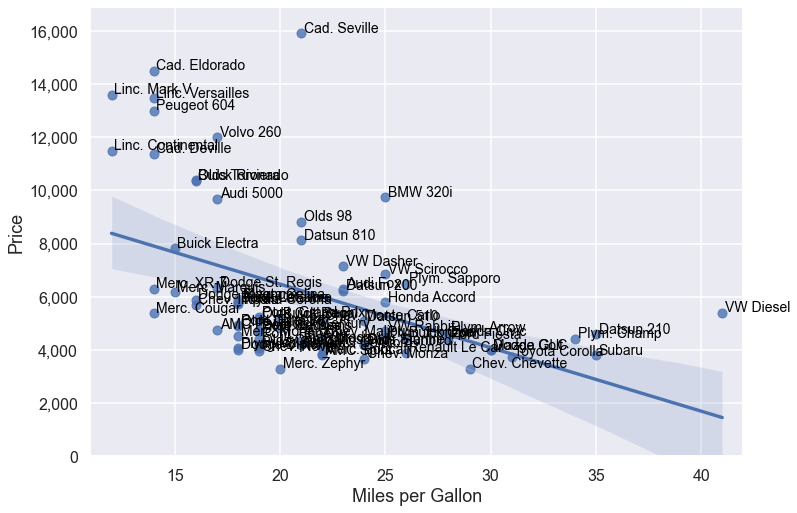

In [10]:
ScatterPlot(car_df)

### Creating some data

In [11]:
car_df['mpg_sq'] = car_df.mpg ** 2

# Analyzing the new data in Stata

In [12]:
%%stata -d car_df
reg price mpg mpg_sq rep78 headroom trunk weight length turn displacement gear_ratio foreign, r 


Linear regression                               Number of obs     =         69
                                                F(11, 57)         =      10.19
                                                Prob > F          =     0.0000
                                                R-squared         =     0.6002
                                                Root MSE          =     2011.4

------------------------------------------------------------------------------
             |               Robust
       price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         mpg |  -193.1419   670.1416    -0.29   0.774    -1535.077    1148.794
      mpg_sq |   3.157538   11.17973     0.28   0.779    -19.22948    25.54455
       rep78 |   135.5068   370.7145     0.37   0.716    -606.8363    877.8498
    headroom |  -622.1795   255.5924    -2.43   0.018    -1133.994   -110.3646
       trunk |

# Additional Information
If you want to perform additional tasks between both programs, you can check this [example notebook](https://nbviewer.jupyter.org/github/TiesdeKok/ipystata/blob/master/ipystata/Example.ipynb) by the author of ``ipystata`` or the [ipystata website](https://github.com/TiesdeKok/ipystata).